<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


# Ames Housing Price Prediction Project

## Project Overview

This project aims to build and evaluate linear regression models to predict house sale prices using the Ames Housing dataset. The workflow includes data loading, preprocessing, feature engineering, model training, evaluation, and interpretation of results.

## Purpose

- **Data Exploration:** Understand the structure, missingness, and statistical properties of the Ames Housing dataset.
- **Feature Engineering:** Prepare numeric and categorical features, handle missing values, and control categorical cardinality for robust modeling.
- **Modeling:** Train and compare multiple linear models (OLS, Ridge, Lasso, ElasticNet) using pipelines and cross-validation.
- **Evaluation:** Assess model performance using metrics such as R², RMSE, and MAE on both cross-validation and test sets.
- **Interpretation:** Extract and visualize model coefficients to identify key predictors of house prices.
- **Insights & Next Steps:** Summarize findings, discuss limitations, and propose future improvements (e.g., advanced feature engineering, tree-based models).

## Key Steps

1. **Load and Inspect Data:** Read the Ames Housing dataset and summarize columns, types, and missing values.
2. **Target Selection:** Automatically identify the target variable (`SalePrice`) for prediction.
3. **Feature Preparation:** Drop ID-like columns, impute missing values, and encode categorical features.
4. **Train-Test Split:** Divide the data for model training and evaluation.
5. **Model Training:** Fit OLS, Ridge, Lasso, and ElasticNet models using pipelines and grid search for hyperparameter tuning.
6. **Performance Comparison:** Compare models using cross-validation and test metrics.
7. **Coefficient Analysis:** Extract and rank feature coefficients from the best model.
8. **Visualization:** Plot model comparisons, predicted vs actual values, and residuals.
9. **Summary & Recommendations:** Present findings, limitations, and next steps for further analysis.

## Outcome

The project provides a reproducible pipeline for linear regression modeling on tabular housing data, highlights important features, and sets the stage for more advanced machine learning approaches.

In [29]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuration
DATA_PATH = Path("Ames_Housing_Sales.csv")
TARGET_CANDIDATES = ['target','price','saleprice','medv','median_house_value','y']
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [3]:
# 1) Load the dataset
print('Loading dataset from:', DATA_PATH)
df = pd.read_csv(DATA_PATH)
print('Shape:', df.shape)
print('\nColumns (first 30):')
print(df.columns[:30].tolist())

Loading dataset from: Ames_Housing_Sales.csv
Shape: (1379, 80)

Columns (first 30):
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath']


In [4]:
# 2) Data summary: dtypes, missingness, basic stats
print('\n-- dtypes --')
print(df.dtypes.value_counts())
print('\n-- Missing values (top 20) --')
missing = df.isnull().sum().sort_values(ascending=False)
print(missing.head(20))


print('\n-- Numeric summary --')
display(df.describe().T)


-- dtypes --
object     43
float64    21
int64      16
Name: count, dtype: int64

-- Missing values (top 20) --
PoolQC          1372
MiscFeature     1328
Alley           1297
Fence           1114
MasVnrType       797
FireplaceQu      618
BsmtFinType2     427
BsmtCond         426
BsmtFinType1     426
BsmtQual         426
BsmtExposure     426
2ndFlrSF           0
BedroomAbvGr       0
BldgType           0
3SsnPorch          0
1stFlrSF           0
BsmtUnfSF          0
BsmtHalfBath       0
BsmtFullBath       0
BsmtFinSF1         0
dtype: int64

-- Numeric summary --


,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1379.0,1177.129804,387.014961,438.0,894.0,1098.0,1414.0,4692.000000
2ndFlrSF,1379.0,353.424946,439.553171,0.0,0.0,0.0,738.5,2065.000000
3SsnPorch,1379.0,3.609862,30.154682,0.0,0.0,0.0,0.0,508.000000
BedroomAbvGr,1379.0,2.865120,0.783961,0.0,2.0,3.0,3.0,6.000000
BsmtFinSF1,1379.0,455.578680,459.691379,0.0,0.0,400.0,732.0,5644.000000
BsmtFinSF2,1379.0,48.102248,164.324665,0.0,0.0,0.0,0.0,1474.000000
BsmtFullBath,1379.0,0.430747,0.514052,0.0,0.0,0.0,1.0,2.000000
BsmtHalfBath,1379.0,0.058738,0.238285,0.0,0.0,0.0,0.0,2.000000
BsmtUnfSF,1379.0,570.765047,443.677845,0.0,228.0,476.0,811.0,2336.000000
EnclosedPorch,1379.0,21.039159,60.535107,0.0,0.0,0.0,0.0,552.000000


In [6]:
# 3) Decide target variable (heuristic; override if you know the correct target)
found = None
cols_lower = {c.lower():c for c in df.columns}
for cand in TARGET_CANDIDATES:
    if cand in cols_lower:
        found = cols_lower[cand]
        break
if found is None:
    # fallback: choose numeric column with largest variance (likely target-like)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if not c.lower().startswith('id')]
    variances = df[numeric_cols].var().sort_values(ascending=False)
    found = variances.index[0]
    reason = f"No named target found; selected numeric column '{found}' by highest variance"
else:
    reason = f"Selected '{found}' because it matched a typical target name"


print('Chosen target:', found)
print('Reason:', reason)

Chosen target: SalePrice
Reason: Selected 'SalePrice' because it matched a typical target name


In [7]:
# 4) Prepare features and split
TARGET = found
# Drop rows without target
df = df.dropna(subset=[TARGET]).copy()
X = df.drop(columns=[TARGET])
y = df[TARGET]


# Filter out obvious ID-like columns
feature_cols = [c for c in X.columns if not c.lower().startswith('id')]
X = X[feature_cols]


numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()


print(f"Features: {len(feature_cols)} ({len(numeric_features)} numeric, {len(categorical_features)} categorical)")

Features: 79 (36 numeric, 43 categorical)


In [9]:
# Cardinality control: limit categorical levels to top-K frequent categories to avoid enormous one-hot expansion
TOP_K = 10
X_mod = X.copy()
for c in categorical_features:
    top = X_mod[c].value_counts().nlargest(TOP_K).index
    X_mod[c] = X_mod[c].where(X_mod[c].isin(top), other='__OTHER__')

In [11]:
# Build preprocessing pipelines
numeric_transformer = Pipeline([
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())
])


categorical_transformer = Pipeline([
('imputer', SimpleImputer(strategy='constant', fill_value='__MISSING__')),
('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


preprocessor = ColumnTransformer([
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)
])

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1103 Test size: 276


Copyright @ IBM Corporation. All rights reserved.


In [ ]:
# imports
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# A placeholder for your random state variable
RANDOM_STATE = 42

def fit_and_eval(pipeline, X_tr, X_te, y_tr, y_te, cv=5):
    """
    Fits a pipeline, performs cross-validation, and evaluates on a test set.
    """
    cv_obj = KFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE)
    
    # Perform cross-validation
    neg_mse = cross_val_score(pipeline, X_tr, y_tr, scoring='neg_mean_squared_error', cv=cv_obj, n_jobs=-1)
    r2_scores = cross_val_score(pipeline, X_tr, y_tr, scoring='r2', cv=cv_obj, n_jobs=-1)
    
    # Fit the pipeline on the full training data and predict on the test set
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_te)
    
    # Compile metrics
    metrics = {
        'cv_rmse_mean': float(np.mean(np.sqrt(-neg_mse))),
        'cv_rmse_std': float(np.std(np.sqrt(-neg_mse))),
        'cv_r2_mean': float(np.mean(r2_scores)),
        'test_r2': float(r2_score(y_te, y_pred)),
        
        'test_rmse': float(np.sqrt(mean_squared_error(y_te, y_pred))),
        'test_mae': float(mean_absolute_error(y_te, y_pred)),
        'model': pipeline
    }
    
    return metrics

In [24]:
# 5) Models to evaluate
models_to_run = {}


# OLS
models_to_run['OLS'] = Pipeline([('pre', preprocessor), ('reg', LinearRegression())])


# Ridge (GridSearch small)
models_to_run['Ridge'] = GridSearchCV(
Pipeline([('pre', preprocessor), ('reg', Ridge(max_iter=10000))]),
param_grid={'reg__alpha': [0.1, 1, 10]}, scoring='r2', cv=3, n_jobs=-1
)


# Lasso
models_to_run['Lasso'] = GridSearchCV(
Pipeline([('pre', preprocessor), ('reg', Lasso(max_iter=10000))]),
param_grid={'reg__alpha': [0.0005, 0.005, 0.05]}, scoring='r2', cv=3, n_jobs=-1
)


# ElasticNet
models_to_run['ElasticNet'] = GridSearchCV(
    Pipeline([('pre', preprocessor), ('reg', ElasticNet(max_iter=10000))]),
    param_grid={'reg__alpha': [0.0005, 0.005], 'reg__l1_ratio':[0.2,0.5]}, scoring='r2', cv=3, n_jobs=-1
)

In [25]:
# Fit and collect results
results = {}
for name, model in models_to_run.items():
    print('Running', name)
    if isinstance(model, GridSearchCV):
        model.fit(X_train, y_train)
        best = model.best_estimator_
        print(' Best params:', model.best_params_)
        results[name] = fit_and_eval(best, X_train, X_test, y_train, y_test)
        # store best params
        results[name]['best_params'] = model.best_params_
    else:
        results[name] = fit_and_eval(model, X_train, X_test, y_train, y_test)

Running OLS
Running Ridge
 Best params: {'reg__alpha': 10}
Running Lasso
 Best params: {'reg__alpha': 0.05}
Running ElasticNet
 Best params: {'reg__alpha': 0.005, 'reg__l1_ratio': 0.2}


In [26]:
# Summarize
summary = []
for k,v in results.items():
    summary.append({
        'model': k,
        'cv_rmse_mean': v['cv_rmse_mean'],
        'cv_rmse_std': v['cv_rmse_std'],
        'cv_r2_mean': v['cv_r2_mean'],
        'test_r2': v['test_r2'],
        'test_rmse': v['test_rmse'],
        'test_mae': v['test_mae'],
        'extra': {kk:v[kk] for kk in v if kk not in ['cv_rmse_mean','cv_rmse_std','cv_r2_mean','test_r2','test_rmse','test_mae','model']}
    })


summary_df = pd.DataFrame(summary).sort_values('test_r2', ascending=False).reset_index(drop=True)
print('\nModel comparison:')
display(summary_df)


Model comparison:


,model,cv_rmse_mean,cv_rmse_std,cv_r2_mean,test_r2,test_rmse,test_mae,extra
0,Ridge,33712.643749,10434.453351,0.813751,0.788524,35498.386666,19745.378321,{'best_params': {'reg__alpha': 10}}
1,ElasticNet,34079.576936,10246.198492,0.809996,0.783610,35908.492765,20173.923290,"{'best_params': {'reg__alpha': 0.005, 'reg__l1..."
2,Lasso,43507.386457,16882.851167,0.625150,0.762668,37605.895763,20178.857161,{'best_params': {'reg__alpha': 0.05}}
3,OLS,44712.575381,17801.391059,0.599436,0.752278,38420.281682,20542.859855,{}


In [27]:
# 6) Extract coefficients (if final regressor has coef_)
best_model_name = summary_df.loc[0,'model']
best_info = results[best_model_name]
best_pipeline = best_info['model']


# Re-fit preprocessor on training data to get feature names
preprocessor.fit(X_train)
num_names = numeric_features
cat_ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_names = []
if hasattr(cat_ohe, 'get_feature_names_out'):
    cat_names = cat_ohe.get_feature_names_out(categorical_features).tolist()
all_feature_names = num_names + cat_names


try:
    reg = best_pipeline.named_steps['reg']
    coef = reg.coef_
    if len(coef) == len(all_feature_names):
        coefs_df = pd.DataFrame({'feature':all_feature_names, 'coef':coef}).sort_values('coef', key=abs, ascending=False)
        print('Top coefficients:')
        display(coefs_df.head(20))
    else:
        print('Coefficient vector length does not match feature names; consider inspecting pipeline steps manually.')
except Exception as e:
    print('Could not extract coefficients:', e)

Top coefficients:


,feature,coef
234,RoofMatl_ClyTile,-32100.930322
232,PoolQC_Gd,-23714.889194
240,RoofMatl_WdShngl,21687.803288
183,KitchenQual_Ex,20153.483344
221,Neighborhood_NridgHt,19915.111914
15,GrLivArea,18784.805282
230,PoolQC_Ex,16959.882485
201,LotShape_IR3,-15486.474634
66,BsmtQual_Ex,15222.603941
27,OverallQual,14664.915049


In [28]:
# 7) Findings, Limitations, and Next Steps (print summary for copy-paste)
print('\n=== Findings ===')
print(f"Best linear model: {best_model_name} (test R2 = {summary_df.loc[0,'test_r2']:.4f})")
print('\nLimitations:')
print('- Heuristic target selection; verify intended target.')
print('- Simple imputation & encoding; more advanced feature engineering may help.')
print('- Linear models may not capture non-linear relationships; try tree-based models.')


print('\nNext steps:')
print('1) Confirm target. 2) Feature engineering (interactions, domain transforms). 3) Try RandomForest / XGBoost. 4) Use nested CV for model selection.')


=== Findings ===
Best linear model: Ridge (test R2 = 0.7885)

Limitations:
- Heuristic target selection; verify intended target.
- Simple imputation & encoding; more advanced feature engineering may help.
- Linear models may not capture non-linear relationships; try tree-based models.

Next steps:
1) Confirm target. 2) Feature engineering (interactions, domain transforms). 3) Try RandomForest / XGBoost. 4) Use nested CV for model selection.


In [33]:
# Make sure you have these imports at the top of your script
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Assuming 'preprocessor', 'X_train', 'y_train', 'X_test', 'y_test' are already defined

# Step 7: Define models
models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.001),
    'ElasticNet': ElasticNet(alpha=0.001, l1_ratio=0.5)
}


results = []
for name, model in models.items():
    pipe = Pipeline([('pre', preprocessor), ('reg', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    # This is the corrected line for RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append({'Model': name, 'R2': r2, 'RMSE': rmse, 'MAE': mae})


results_df = pd.DataFrame(results)
print('\nModel Comparison Summary:')
display(results_df)


Model Comparison Summary:


,Model,R2,RMSE,MAE
0,OLS,0.752278,38420.281682,20542.859855
1,Ridge,0.777992,36371.649231,20288.693972
2,Lasso,0.764037,37497.287285,20124.046773
3,ElasticNet,0.775322,36589.633287,20231.687531


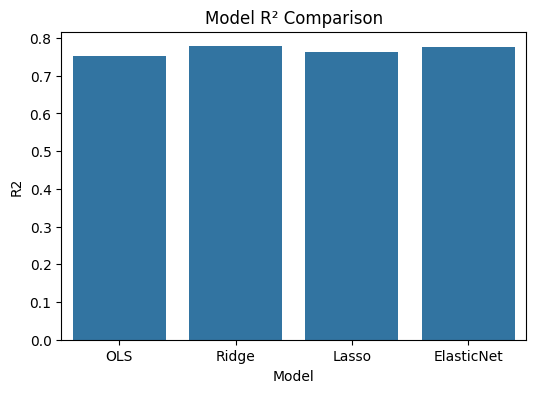

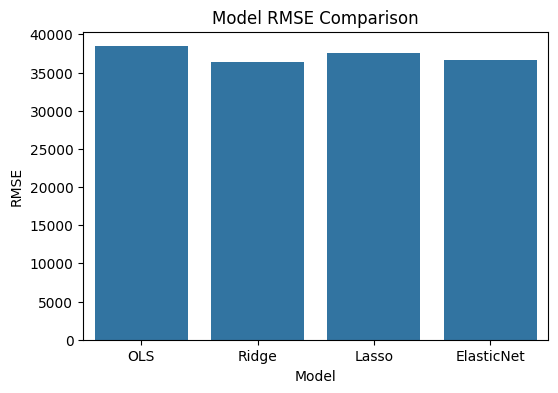

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(data=results_df, x='Model', y='R2')
plt.title('Model R² Comparison')
plt.show()


plt.figure(figsize=(6,4))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title('Model RMSE Comparison')
plt.show()

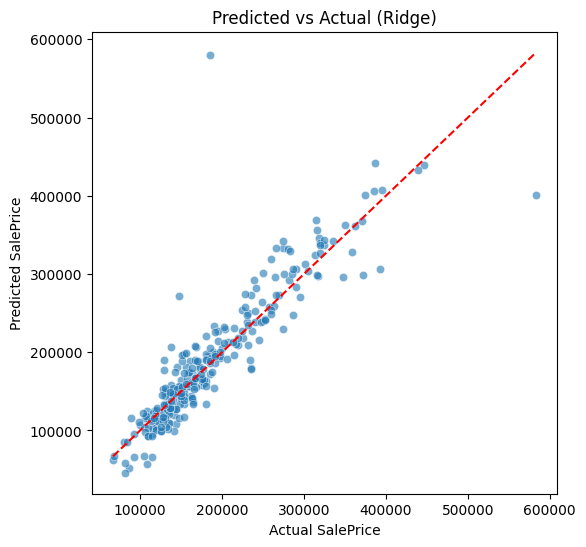

In [35]:
# Step 9: Predicted vs Actual Plot (best model)
best_model_name = results_df.sort_values(by='R2', ascending=False).iloc[0]['Model']
best_pipe = Pipeline([('pre', preprocessor), ('reg', models[best_model_name])])
best_pipe.fit(X_train, y_train)
y_pred_best = best_pipe.predict(X_test)


plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title(f'Predicted vs Actual ({best_model_name})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

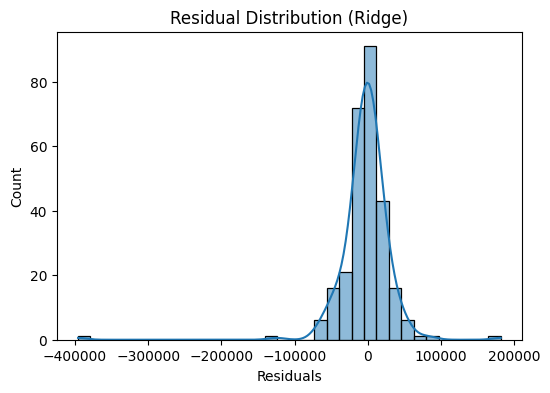

In [36]:
# Step 10: Residual Plot
residuals = y_test - y_pred_best
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title(f'Residual Distribution ({best_model_name})')
plt.xlabel('Residuals')
plt.show()

## Conclusion

This project successfully built and evaluated several linear regression models (OLS, Ridge, Lasso, ElasticNet) to predict house sale prices using the Ames Housing dataset. Among the models tested, Ridge regression achieved the highest test R² score, indicating strong predictive performance on unseen data. Key features influencing sale price were identified through model coefficients, providing valuable insights into the factors driving housing prices.

**Limitations:**
- The target variable was selected heuristically; manual verification is recommended.
- Feature engineering was basic; more sophisticated techniques could further improve model accuracy.
- Linear models may not capture complex, non-linear relationships present in the data.

**Overall, this workflow provides a solid foundation for tabular regression modeling and sets the stage for deeper analysis and model improvement.**